# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.8.0'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

iso_alpha_3
administrative_area_level
data_type
url
title
year
bibtype
author
institution
textVersion

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

iso_alpha_3
administrative_area_level
data_type
url
title
year
bibtype
author
institution
textVersion

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
191163,2020-08-25,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
191164,2020-08-26,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
191165,2020-08-27,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
191166,2020-08-28,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
191167,2020-08-29,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
191163,2020-08-25,Colombia,Vichada,14,2,0,12
191164,2020-08-26,Colombia,Vichada,14,2,0,12
191165,2020-08-27,Colombia,Vichada,14,2,0,12
191166,2020-08-28,Colombia,Vichada,14,2,0,12
191167,2020-08-29,Colombia,Vichada,14,2,0,12


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
159,2020-08-25,19610,3229,354,16027
160,2020-08-26,19846,3129,356,16361
161,2020-08-27,20096,3047,356,16693
162,2020-08-28,20322,2959,358,17005
163,2020-08-29,20569,2800,358,17411


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-08-25,23820054,7495196,820425,15504433,0.017221,0.325449,0.050256
2020-08-26,24086868,7536874,826474,15723520,0.017156,0.326392,0.049938
2020-08-27,24358561,7605277,832207,15921077,0.017082,0.326807,0.049674
2020-08-28,24630651,7678814,837403,16114434,0.016999,0.327122,0.049399
2020-08-29,24634075,7679272,837430,16117373,0.016997,0.327136,0.049392


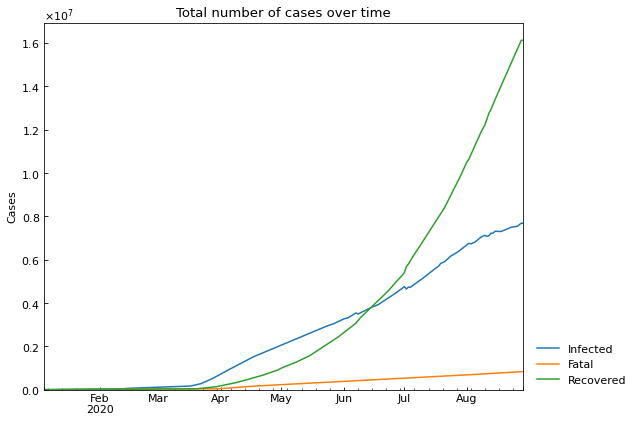

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
198,2020-08-25,63919,12290,1216,50413
199,2020-08-26,64821,11919,1229,51673
200,2020-08-27,65685,11639,1240,52806
201,2020-08-28,66561,11325,1260,53976
202,2020-08-29,67405,10813,1271,55321


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
196,2020-08-25,63121,11494,1196,50431
197,2020-08-26,63822,10925,1209,51688
198,2020-08-27,64668,10619,1226,52823
199,2020-08-28,65573,10340,1238,53995
200,2020-08-29,66423,9827,1255,55341


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
191163,2020-08-25,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
191164,2020-08-26,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
191165,2020-08-27,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
191166,2020-08-28,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
191167,2020-08-29,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
187515,COL,Colombia,Vichada,2020-08-25,107808
187516,COL,Colombia,Vichada,2020-08-26,107808
187517,COL,Colombia,Vichada,2020-08-27,107808
187518,COL,Colombia,Vichada,2020-08-28,107808
187519,COL,Colombia,Vichada,2020-08-29,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
191163,2020-08-25,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
191164,2020-08-26,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
191165,2020-08-27,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
191166,2020-08-28,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
191167,2020-08-29,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
191163,2020-08-25,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
191164,2020-08-26,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
191165,2020-08-27,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
191166,2020-08-28,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
191167,2020-08-29,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
234,2020-08-25,1,1,1,0,0,1,1,3,2,2,1,30.56
235,2020-08-26,1,1,1,0,0,1,1,3,2,2,1,30.56
236,2020-08-27,1,1,1,0,0,1,1,3,2,2,1,30.56
237,2020-08-28,1,1,1,0,0,1,1,3,2,2,1,30.56
238,2020-08-29,1,1,1,0,0,1,1,3,2,2,1,30.56


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
234,2020-08-25,1,1,1,0,0,1,1,3,2,2,1,30.56
235,2020-08-26,1,1,1,0,0,1,1,3,2,2,1,30.56
236,2020-08-27,1,1,1,0,0,1,1,3,2,2,1,30.56
237,2020-08-28,1,1,1,0,0,1,1,3,2,2,1,30.56
238,2020-08-29,1,1,1,0,0,1,1,3,2,2,1,30.56


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

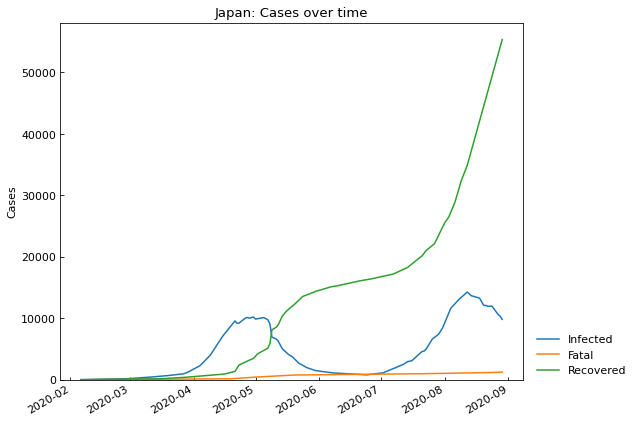

,Date,Confirmed,Infected,Fatal,Recovered
196,2020-08-25,63121,11494,1196,50431
197,2020-08-26,63822,10925,1209,51688
198,2020-08-27,64668,10619,1226,52823
199,2020-08-28,65573,10340,1238,53995
200,2020-08-29,66423,9827,1255,55341


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

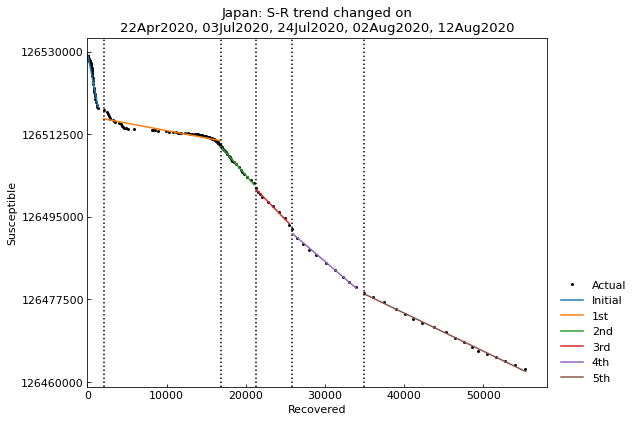

,Type,Start,End,Population
1st,Past,22Apr2020,02Jul2020,126529100
2nd,Past,03Jul2020,23Jul2020,126529100
3rd,Past,24Jul2020,01Aug2020,126529100
4th,Past,02Aug2020,11Aug2020,126529100
5th,Past,12Aug2020,29Aug2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	5th phase (12Aug2020 - 29Aug2020): finished  770 trials in 0 min 25 sec

	3rd phase (24Jul2020 - 01Aug2020): finished 1041 trials in 0 min 25 sec

	2nd phase (03Jul2020 - 23Jul2020): finished 1993 trials in 1 min  0 sec

	1st phase (22Apr2020 - 02Jul2020): finished 1946 trials in 1 min  0 sec

	4th phase (02Aug2020 - 11Aug2020): finished 1993 trials in 1 min  0 sec

Completed optimization. Total: 1 min 25 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],alpha1 [-],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,22Apr2020,02Jul2020,126529100,SIR-F,0.38,0.118014,0.000002,0.028274,0.066460,1440,530154,0.118,35,15,0.761916,1946,1 min 0 sec
2nd,Past,03Jul2020,23Jul2020,126529100,SIR-F,2.01,0.000057,0.000236,0.148543,0.073676,1440,4246,0.000,6,13,0.048813,1993,1 min 0 sec
3rd,Past,24Jul2020,01Aug2020,126529100,SIR-F,1.84,0.000726,0.000120,0.134241,0.072807,1440,8341,0.001,7,13,0.019265,1041,0 min 25 sec
4th,Past,02Aug2020,11Aug2020,126529100,SIR-F,1.64,0.000565,0.000311,0.115837,0.070247,1440,3215,0.001,8,14,0.037788,1993,1 min 0 sec
5th,Past,12Aug2020,29Aug2020,126529100,SIR-F,0.82,0.000020,0.000842,0.081143,0.098707,1440,1187,0.000,12,10,0.025904,770,0 min 25 sec


### Accuracy of estimation

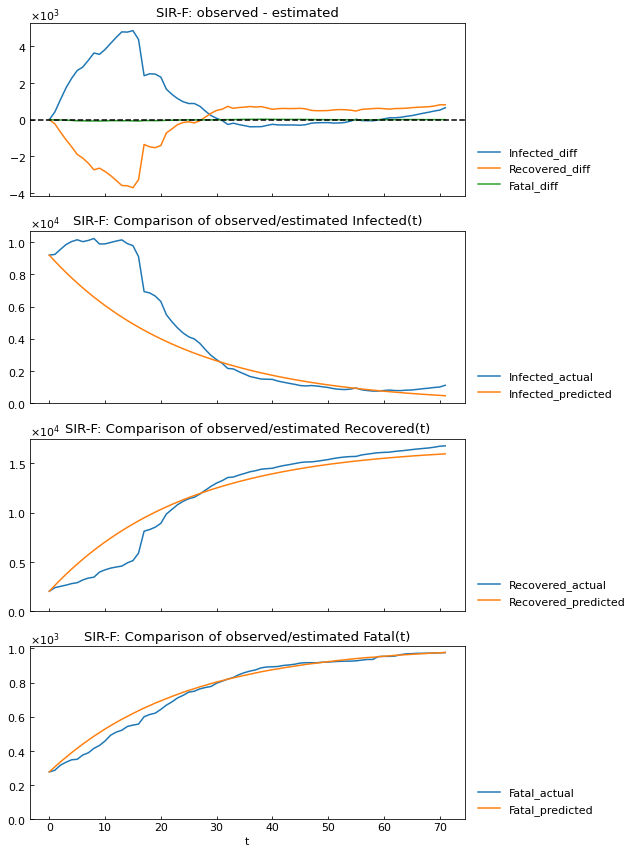

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.64

### Show parameter history

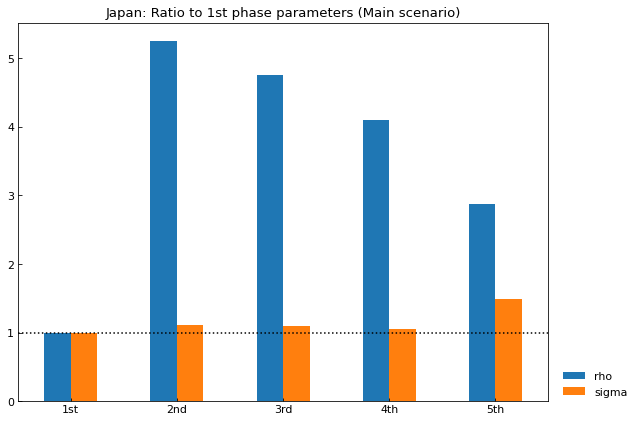

,1st,2nd,3rd,4th,5th
rho,1.0,5.253628,4.747785,4.096888,2.869826
sigma,1.0,1.108563,1.095501,1.056982,1.485202


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

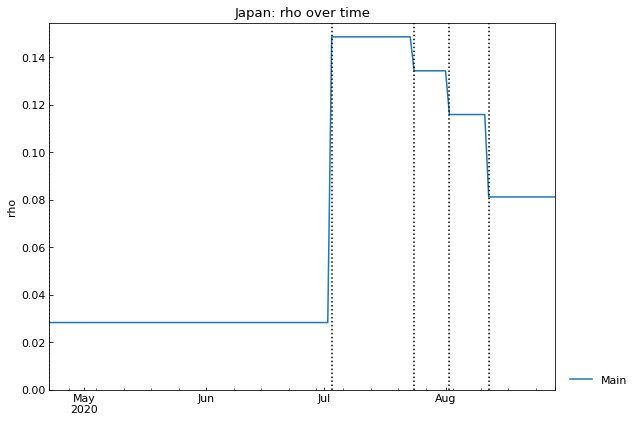

In [33]:
# version >= 2.8.0
_ = scenario.history(target="rho")

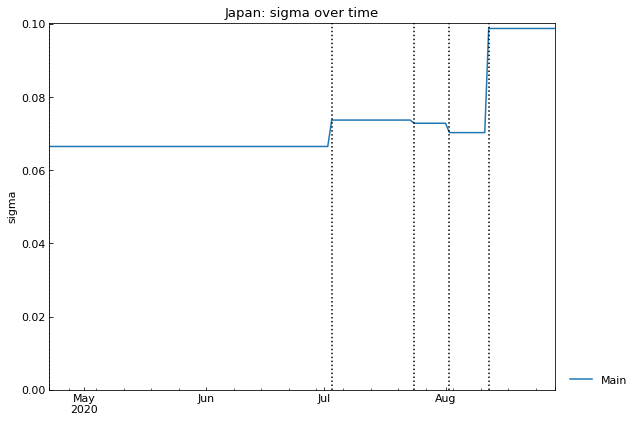

In [34]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

### Show the history of reproduction number

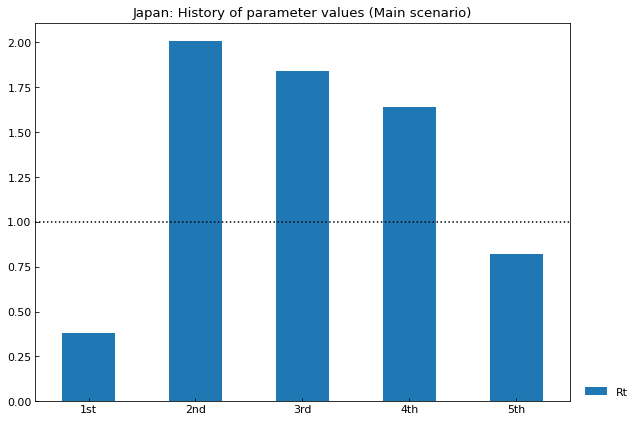

,1st,2nd,3rd,4th,5th
Rt,0.38,2.01,1.84,1.64,0.82


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

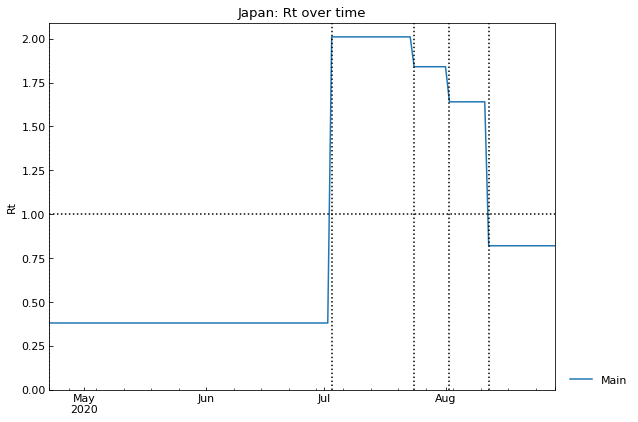

In [36]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

### Simulate the number of cases

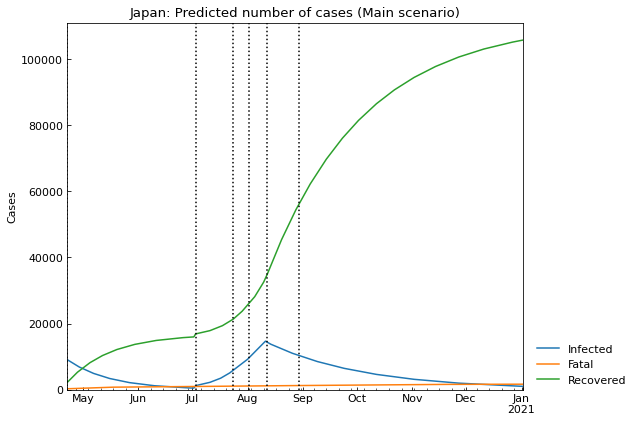

,Date,Confirmed,Fatal,Infected,Recovered
251,2020-12-29,108049,1660,1097,105292
252,2020-12-30,108137,1661,1077,105399
253,2020-12-31,108224,1662,1057,105505
254,2021-01-01,108309,1663,1038,105608
255,2021-01-02,108392,1664,1019,105709


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.09870706771781369

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.19741413543562739

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     1st      Past  22Apr2020  02Jul2020   126529100  SIR-F  0.38   
         2nd      Past  03Jul2020  23Jul2020   126529100  SIR-F  2.01   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.84   
         4th      Past  02Aug2020  11Aug2020   126529100  SIR-F  1.64   
         5th      Past  12Aug2020  29Aug2020   126529100  SIR-F  0.82   
         6th    Future  30Aug2020  01Jan2021   126529100  SIR-F  0.82   
Medicine 1st      Past  22Apr2020  02Jul2020   126529100  SIR-F  0.38   
         2nd      Past  03Jul2020  23Jul2020   126529100  SIR-F  2.01   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.84   
         4th      Past  02Aug2020  11Aug2020   126529100  SIR-F  1.64   
         5th      Past  12Aug2020  29Aug2020   126529100  SIR-F  0.82   
         6th    Future  30Aug2020  29Sep2020   126529100  SIR-F  0.82   
         7th    Future  30Sep2020  01Jan2021   126529100  SIR-F  0.41   

                   theta     kappa       rho     sigma   tau  1/alpha2 [day]  \
Scenario Phase                                                                 
Main     1st    0.118014  0.000002  0.028274  0.066460  1440          530154   
         2nd    0.000057  0.000236  0.148543  0.073676  1440            4246   
         3rd    0.000726  0.000120  0.134241  0.072807  1440            8341   
         4th    0.000565  0.000311  0.115837  0.070247  1440            3215   
         5th    0.000020  0.000842  0.081143  0.098707  1440            1187   
         6th    0.000020  0.000842  0.081143  0.098707  1440            1187   
Medicine 1st    0.118014  0.000002  0.028274  0.066460  1440          530154   
         2nd    0.000057  0.000236  0.148543  0.073676  1440            4246   
         3rd    0.000726  0.000120  0.134241  0.072807  1440            8341   
         4th    0.000565  0.000311  0.115837  0.070247  1440            3215   
         5th    0.000020  0.000842  0.081143  0.098707  1440            1187   
         6th    0.000020  0.000842  0.081143  0.098707  1440            1187   
         7th    0.000020  0.000842  0.081143  0.197414  1440            1187   

                alpha1 [-]  1/beta [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                              
Main     1st         0.118            35             15   0.761916   1946   
         2nd         0.000             6             13  0.0488126   1993   
         3rd         0.001             7             13  0.0192649   1041   
         4th         0.001             8             14  0.0377876   1993   
         5th         0.000            12             10  0.0259036    770   
         6th         0.000            12             10          -      -   
Medicine 1st         0.118            35             15   0.761916   1946   
         2nd         0.000             6             13  0.0488126   1993   
         3rd         0.001             7             13  0.0192649   1041   
         4th         0.001             8             14  0.0377876   1993   
         5th         0.000            12             10  0.0259036    770   
         6th         0.000            12             10          -      -   
         7th         0.000            12              5          -      -   

                     Runtime  
Scenario Phase                
Main     1st    1 min  0 sec  
         2nd    1 min  0 sec  
         3rd    0 min 25 sec  
         4th    1 min  0 sec  
         5th    0 min 25 sec  
         6th               -  
Medicine 1st    1 min  0 sec  
         2nd    1 min  0 sec  
         3rd    0 min 25 sec  
         4th    1 min  0 sec  
         5th    0 min 25 sec  
         6th               -  
         7th               -

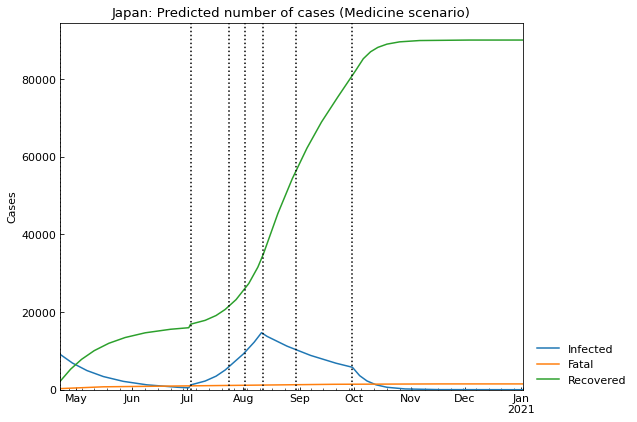

,Date,Confirmed,Fatal,Infected,Recovered
251,2020-12-29,91513,1489,0,90024
252,2020-12-30,91513,1489,0,90024
253,2020-12-31,91513,1489,0,90024
254,2021-01-01,91513,1489,0,90024
255,2021-01-02,91513,1489,0,90024


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,7th_Rt
Main,14674,11Aug2020,1019,1664,-
Medicine,14674,11Aug2020,0,1489,0.41


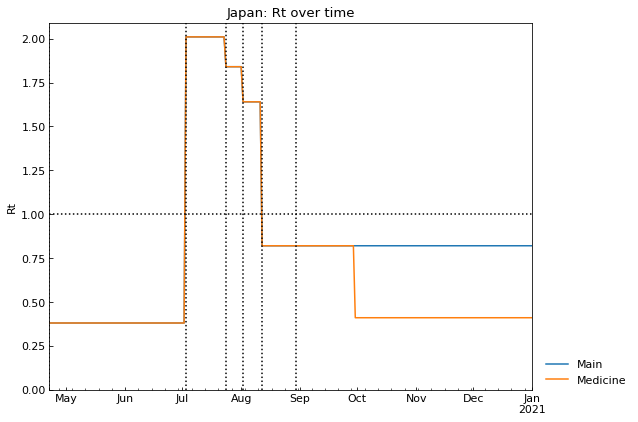

In [43]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

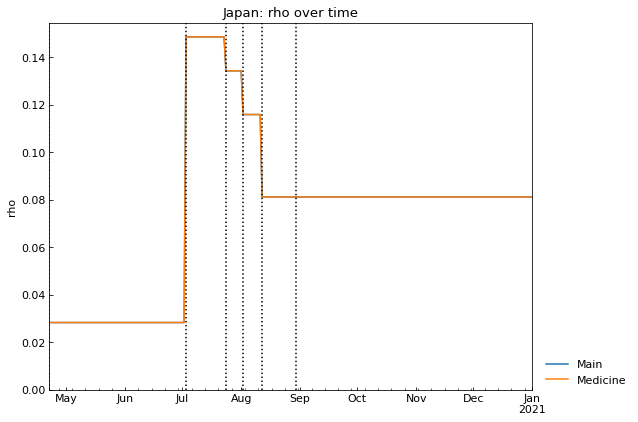

In [44]:
# version >= 2.8.0
_ = scenario.history(target="rho")

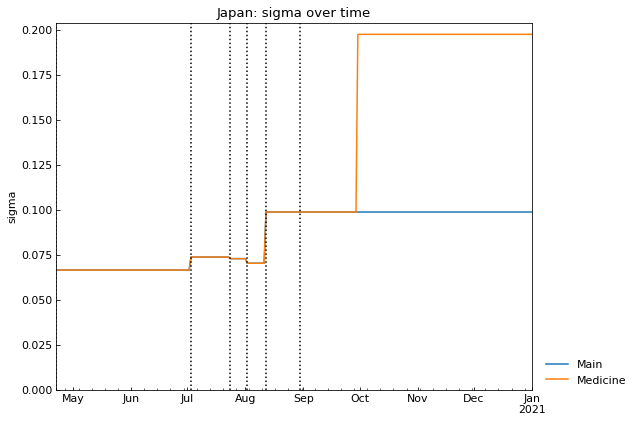

In [45]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

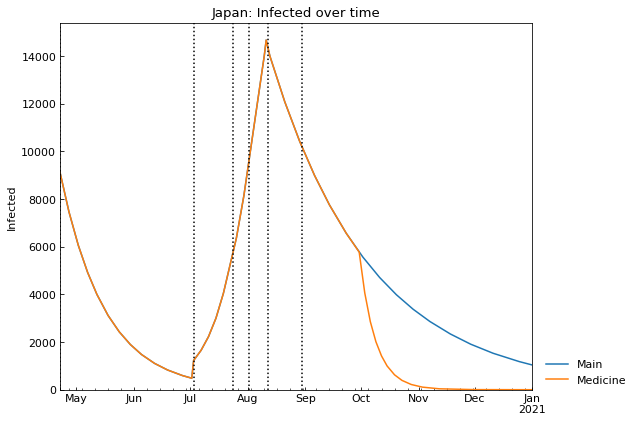

In [46]:
# version >= 2.8.0
_ = scenario.history(target="Infected")